In [1]:
#Ahmet Kemal Yetkin
#504201506
#########################
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections
import random as rnd

### Hyperparameters

In [33]:
nodeCount = 100    #Size of Network
networkCount = 30  #Total Number of Networks
m = 2              #Number of edges to attach from a new node to existing nodes
prob_min = 0.1    # Minimum Probability Value
prob_max = 0.85    # Maximum Probability Value
probs = np.linspace(prob_min, prob_max, num=networkCount) #As many probabilities as the total number of networks

# Part A: Simulate exponential and free-scale networks
## Creating ER and SF Networks

Since  the Barabasi network is undirected, it has been used as scale-free network.

In [34]:
def createERGraph(n, p):
    ER = nx.erdos_renyi_graph(n, p, seed=np.random.seed(1), directed=False)
    for u,v,d in ER.edges(data=True):
        d['weight'] = rnd.randint(1, 10)
    return ER

def createBarabasiGraph(n, m):
    SF = nx.barabasi_albert_graph(n, m, seed=np.random.seed(1))
    for u,v,d in SF.edges(data=True):
        d['weight'] = rnd.randint(1, 10)
    return SF

# Another function for scale-free graph. However, since it is generating directed graph, 
# Barabasi is more useful for this paper.
# def createSFGraph(n, p):
#     #0.05 is substracted from probability since the gamma value is 0.05 . The total should be equal to 1.
#     SF = nx.scale_free_graph(n, alpha=(1-p)-0.05, beta=p, seed=np.random.seed(1))
#     for u,v,d in SF.edges(data=True):
#         d['weight'] = rnd.randint(1, 10)
#     return SF


ERNetworks = []
for i in range(networkCount):
  ERNetworks.append(createERGraph(nodeCount, probs[i])) #probs[i]

SFNetworks = []
for i in range(networkCount):
  SFNetworks.append(createBarabasiGraph(nodeCount, m))

def visualizeGraphs(G1_title, G1, G2_title, G2):
    colors = ['red','blue','yellow','green','purple']    
    G1_colors = {}
    G2_colors = {}
    for node in G1.nodes():
        G1_colors[node] = np.random.randint(0,len(colors))
    for node in G2.nodes():
        G2_colors[node] = np.random.randint(0,len(colors))
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
    ax = axes.flatten()
    ax[0].title.set_text(G1_title)
    ax[1].title.set_text(G2_title)

    pos = nx.spring_layout(G1)
    for i in range(len(colors)):
        nx.draw_networkx_nodes(G1, pos, [x for x in G1.nodes() if G1_colors[x]==i], node_color=colors[i], ax=ax[0])
    nx.draw_networkx_edges(G1, pos, width=1, alpha=0.6, ax=ax[0])
    ax[0].set_axis_off()
    pos = nx.spring_layout(G2)
    
    for i in range(len(colors)):
        nx.draw_networkx_nodes(G2, pos, [x for x in G2.nodes() if G2_colors[x]==i], node_color=colors[i], ax=ax[1])
    nx.draw_networkx_edges(G2, pos, width=1, alpha=0.6, ax=ax[1])
    ax[1].set_axis_off()
    plt.show()
    

def visualizeGraph(G_title, G):
    colors = ['red','blue','yellow','green','purple']    
    G_colors = {}
    for node in G.nodes():
        G_colors[node] = np.random.randint(0,len(colors))
    
    pos = nx.spring_layout(G)
    for i in range(len(colors)):
        nx.draw_networkx_nodes(G, pos, [x for x in G.nodes() if G_colors[x]==i], node_color=colors[i])
    nx.draw_networkx_edges(G, pos, width=1, alpha=0.6)
    plt.show()


### 1. Briefly explain how the weighted Erdos-Renyi generative model works.

ER(n, p) is a random graph with n vertices where each possible edge has probability p of existing. Returns an undirected and weighted graph with the number of nodes and the probability value. The ER(n, p) model chooses each of the possible edges with probability p.

### 2. What are the key properties of weighted Erdos-Renyi (ER) graphs?
The key properties of the ER is that the number of edges in a ER(n, p) graph is a variable with expected value (n.(n-1)/2) * p. In addition, it is possible to have the same number of connections in the graphs.

### 3. Briefly explain how weighted scale-free (SF) algorithm works.
Scale-free networks include multiple "highly connected" nodes which means hub nodes, communication hubs shape the way the network works. The ratio of nodes most closely linked to the number of nodes in the entire network remains the same as the network changes in size.

### 4. What are the key properties of weighted SF graphs?
A crucial key properties of scale-free network model is that the scale-free networks can reach more nodes when comparing with Erdos-Renyi model. When the size increases scale-free networks become more efficient than Erdos-Renyi networks. However, usually well connected nodes are more common in a normal distribution. Therefore, small number of highly connected nodes can be found often in SF networks. Scale-free networks are resistant to random failures but they are sensitive to target attacks.

### 5. Visualize two random graphs you simulated (ER and SF).

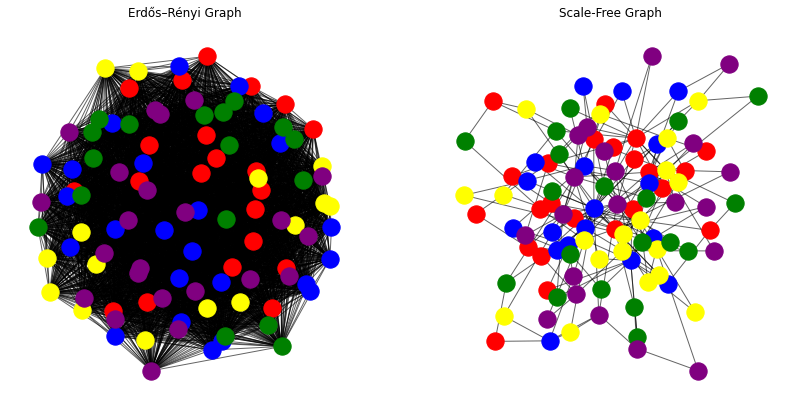

In [36]:
visualizeGraphs("Erdős–Rényi Graph", ERNetworks[rnd.randint(0, networkCount-1)], "Scale-Free Graph", 
               SFNetworks[rnd.randint(0, networkCount-1)])


### 6. Plot the overlaid distributions of the node strength centrality for all 30 ER graphs (transparent blue color) and the 30 SF graphs (transparent red color). What do you notice? Interpret your observation.


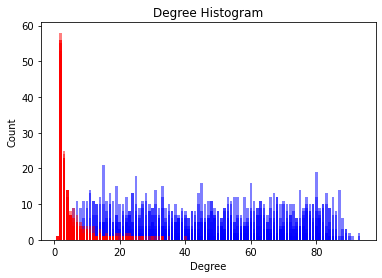

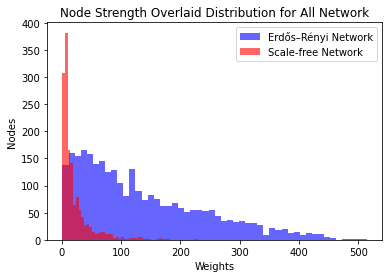

In [37]:
# reference: https://networkx.org/documentation/networkx-2.4/auto_examples/drawing/plot_degree_histogram.html

for graph1 in ERNetworks:
    degree_sequence = sorted([d for n, d in graph1.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    plt.bar(deg, cnt, width=0.80, color='b', alpha=0.5)


for graph2 in SFNetworks:
    degree_sequence = sorted([d for n, d in graph2.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    plt.bar(deg, cnt, width=0.80, color='r', alpha=0.5)
    
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()


def node_strength_centrality(G):
    count = 0
    weight_list = []
    for u,v,d in G.edges(data=True):
        if(count==0):
            count = 1
            node = u
            node_weight = d["weight"]
            
        elif(u==node):
            node_weight += d["weight"]
            
        else:
            node = u
            weight_list.append(node_weight)
            node_weight = d["weight"]

    return weight_list
        

plt.xlabel("Weights")
plt.ylabel("Nodes")
plt.title("Node Strength Overlaid Distribution for All Network")

total_centrality_ER = []
for graph in ERNetworks:
    centrality = node_strength_centrality(graph)
    total_centrality_ER += centrality
plt.hist(total_centrality_ER, bins=50, color='b', alpha=0.6, label="Erdős–Rényi Network")

total_centrality_SF = []
for graph in SFNetworks:
    centrality = node_strength_centrality(graph)
    total_centrality_SF += centrality
plt.hist(total_centrality_SF, bins=50, color='r', alpha=0.6, label="Scale-free Network")

plt.legend()
plt.show()

Compared to the ER graph, the hub nodes come to the fore as there are many nodes connected to the hub nodes in the SF graph. However, in the opposite case, we see a dispersed distribution in the ER graph as the nodes are more distributed on the graph instead of being connected to the hub nodes.

### 7. Plot the overlaid distributions of the eigenvector centrality for all 30 ER graphs (transparent blue color) and the 30 SF graphs (transparent red color). What do you notice? Interpret your observation.


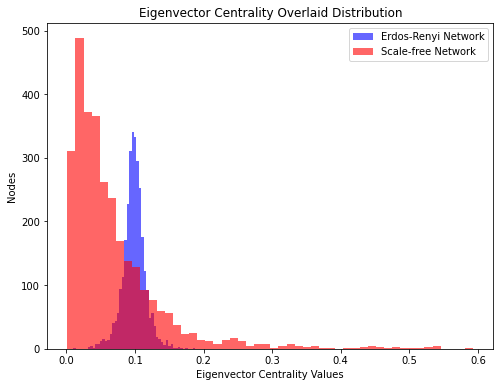

In [38]:
plt.figure(figsize=(8,6))
plt.xlabel("Eigenvector Centrality Values")
plt.ylabel("Nodes")
plt.title("Eigenvector Centrality Overlaid Distribution")
centrality_eigen_list = []
for graph in ERNetworks:
    centrality_eigen = nx.eigenvector_centrality(graph, weight = "weight", max_iter = 100000).values()
    centrality_eigen_list += centrality_eigen
plt.hist(list(centrality_eigen_list), bins=50, alpha=0.6, color='b', label="Erdos-Renyi Network")
  
n_centrality_eigen_list = []
for graph in SFNetworks:
    n_centrality_eigen = nx.eigenvector_centrality(graph, weight = "weight", max_iter = 100000).values()
    n_centrality_eigen_list += n_centrality_eigen
plt.hist(list(n_centrality_eigen_list), bins=50, alpha=0.6, color='r', label="Scale-free Network")
plt.legend()
plt.show()

Let's think three hub node in SF graph and they are connected to each other. If we choose one of these hub nodes since the eigenvector centrality definition accounts for both quantity and quality, its eigenvector centrality will be too high. It's because in degree centrality it is only checking the quantity, however, eigenvector centrality also checks degree at its neighbors.


## Part B: Analyzing Erdos-Renyi and Scale-Free graphs in both random error and target attack scenarios

### 1. Code up a function called ‘findPercolationThreshold’, where you input a positive weighted adjacency matrix and it automatically outputs its percolation threshold fc.



In [39]:
ER_adjMatrix = nx.linalg.adjacency_matrix(ERNetworks[rnd.randint(0, networkCount-1)], weight="weight").toarray()
print(ER_adjMatrix)
SF_adjMatrix = nx.linalg.adjacency_matrix(SFNetworks[rnd.randint(0, networkCount-1)], weight="weight").toarray()
print(SF_adjMatrix)

def findPercolationThreshold(mat):
    return

[[ 0 10 10 ... 10  2 10]
 [10  0  4 ...  0  1  0]
 [10  4  0 ...  0  0  0]
 ...
 [10  0  0 ...  0  0  0]
 [ 2  1  0 ...  0  0  0]
 [10  0  0 ...  0  0  0]]
[[0 4 4 ... 0 0 0]
 [4 0 0 ... 6 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [0 6 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 2. Comment out each line of your ‘findPercolationThreshold’ function and add a text box explaining how your algorithm works.

### 3. Code up a function called ‘largestConnectedComponent’, where you input a positive weighted adjacency matrix and it automatically outputs (1) the largest connected component graph, (2) its node size S and (3) its diameter d defined as the average of the shortest paths between all pairs of nodes in the large connected component graph.

The size of the largest connected component is: 196
The diameter of the largest connected component is: 4


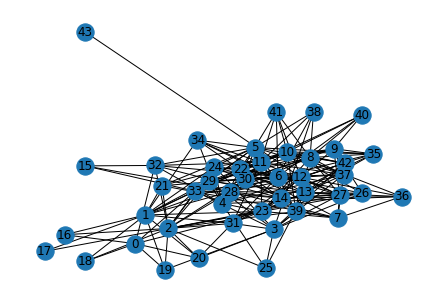

In [40]:
# reference: https://www.geeksforgeeks.org/largest-connected-component-on-a-grid/
# stores information about  which cell
# are already visited in a particular BFS
visited = [[0 for j in range(nodeCount)]for i in range(nodeCount)]

# result stores the final result grid
result = [[0 for j in range(nodeCount)]for i in range(nodeCount)]
  
# stores the count of cells in the largest
# connected component
COUNT = 0
  
# Function checks if a cell is valid i.e it
# is inside the grid and equal to the key
def is_valid(x, y, input):
 
    if (x < nodeCount and y < nodeCount and x >= 0 and y >= 0):
        if (visited[x][y] == 0 and input[x][y] > 0):
            return True
        else:
            return False
     
    else:
        return False
  
# BFS to find all cells in
# connection with key = input[i][j]
def BFS(x, y, i, j, input):
     
    global COUNT
     
    # terminating case for BFS
    if (x == 0 & y == 0):
        return
  
    visited[i][j] = 1
    visited[j][i] = 1
    COUNT += 1
  
    # x_move and y_move arrays
    # are the possible movements
    # in x or y direction
    x_move = [ 0, 0, 1, -1 ]
    y_move = [ 1, -1, 0, 0 ]
  
    # checks all four points connected with input[i][j]
    for u in range(4):
     
        if (is_valid(i + y_move[u], j + x_move[u], input)):
            BFS(x, y, i + y_move[u], j + x_move[u], input)
  

# Visited array is reset to zero
def reset_visited():
 
    for i in range(nodeCount):
        for j in range(nodeCount):
            visited[i][j] = 0
  
# If a larger connected component
# is found this function is called
# to store information about that component.
def reset_result(input):
 
    for i in range(nodeCount):
        for j in range(nodeCount):
            if (visited[i][j] != 0 and input[i][j] > 0):
                result[i][j] = input[i][j]
            else:
                result[i][j] = 0
         
# function to rearrange matrix for non-zero values
def rearrange_matrix(result_new):
    i = 0
    flag = True
    # Loop for removing the all-zero rows
    while(i < nodeCount):
        check = 0
        for j in range(nodeCount):
            shape_check = result_new.shape[0]

            if(i < shape_check):

                if(result_new[i][j] == 0):
                    check += 1
                    if(check==nodeCount):
                        result_new = np.delete(result_new, i, 0)
                        i = 0
                        flag = False
                    else: flag = True
        if(flag): 
            i += 1
    i=0
    # Loop for removing the all-zero columns
    while(i < nodeCount):
        check = 0
        for j in range(result_new.shape[0]):
            shape_check = result_new.shape[1]

            if(i < shape_check):

                if(result_new[j][i] == 0):
                    check += 1
                    if(check==result_new.shape[0]):
                        result_new = np.delete(result_new, i, 1)
                        i = 0
                        flag = False
                    else: flag = True
        if(flag): 
            i += 1
    return result_new


# function to calculate the largest connected
# component
def largestConnectedComponent(input):
 
    global COUNT
    current_max = -10000000000
    # Checks for all matrix
    for i in range(nodeCount):
        for j in range(nodeCount):
            reset_visited()
            COUNT = 0

            # checking cell to the right
            if (j + 1 < nodeCount):
                BFS(input[i][j], input[i][j + 1], i, j, input)
  
            # updating result
            if (COUNT >= current_max):
                current_max = COUNT
                reset_result(input)
            # reseting visited
            reset_visited()
            COUNT = 0
  
            # checking cell downwards
            if (i + 1 < nodeCount):
                BFS(input[i][j], input[i + 1][j], i, j, input)
  
            # updating result
            if (COUNT >= current_max):
                current_max = COUNT
                reset_result(input)
    
    return rearrange_matrix(np.array(result)), current_max

matrix, current_max = largestConnectedComponent(ER_adjMatrix)

G = nx.from_numpy_matrix(np.array(matrix))

# (1) Largest Component Graph
graph = nx.draw(G, with_labels= True)

# (2) LCC Node Size
print("The size of the largest connected "+
    "component is: " + "\033[1m" + str(current_max) + "\033[0;0m")

# (3) LCC Diameter
diameter = nx.diameter(G)
print("The diameter of the largest connected "+
    "component is: " + "\033[1m" + str(diameter) + "\033[0;0m")

In largestConnectedComponent(), firstly, it checks for the number in the matrix. When it finds a number, it starts to search with BFS algorithm for finding other numbers in the directions. Direction start to search with the right side. Then, it checks other directions. When there is no number left on the directions (three directions are zero), it saves the length of this graph. Then, it starts to search for a new number again. If it finds the component larger than previous, it updates the copy matrix. This process continues until the end of the matrix. After that it returns the rearranged matrix and current max variables.

### 5. Random failure scenario. Code up a function called ‘randomError’, inputting (1) the graph adjacency matrix and (2) the fraction (between 0 and 1) of nodes to be randomly removed and returns the adjancy matrix graph excluding the removed nodes. Comment out the code and explain in a text box how it works.

In [57]:
def randomError(adj_matrix, fraction):
    #First, node list is created that will be removed from the matrix. 
    #The fraction will be determine the list length
    nodes_remove_list = rnd.sample(range(0, nodeCount-1), int(nodeCount*fraction))
    #Remove random determined nodes from the matrix
    for i in nodes_remove_list:
        adj_matrix[i] = 0
        adj_matrix[:,i] = 0
    return adj_matrix

First, randomError() creates a list with nodes that will be removed from the matrix. It determines the list length with fraction value. The list will be created randomly between 0 to node count. Then, it starts to remove them from matrix and returns the matrix with removed nodes.

### 6. Target attack scenario. Code up a function called ‘targetAttack’, inputting (1) the graph adjacency matrix and (2) the fraction (between 0 and 1) of nodes to be attacked removed and returns the adjancy matrix graph excluding the removed nodes. Note that the nodes to be removed are those with the highest strength. Comment out the code and explain in a text box how it works.


In [60]:
def targetAttack(adj_matrix, fraction):  
    for i in range(int(nodeCount * fraction)): #The range determined by fraction
        decreasing_list = np.array(np.sum(adj_matrix, axis=0))
        most_important = np.argmax(decreasing_list)
        adj_matrix[most_important] = 0
        adj_matrix[:,most_important] = 0
    
    return adj_matrix

### 8. What conclusions can you derive about SF and ER networks and their resilience to random errors and target attacks? Are these conclusions in line with the paper paper[1]?


SF has some hub nodes which means distribution is less. When we remove the hub node from SF, it is hard to find the path again. However, in ER network distribition is not less. ER network is more difficult to completely fragmented than SF. ER network are ressillant to target attack. When attack to the largest component, the size is decreasing. After a time, every node will be fragmented which means singleton (completely fragmented).